# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Home Assignment 6 </center>**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

### Задание 1.

В файле `HA_6_Data.txt` лежит информация о баллах Мистера "Х" за курс "Введение в Python". В этом файле содержится информация о баллах за каждое из 6 дз (максимально возможный балл - 10), общий балл за дз (максимально возможный балл - 60) и балл за финальный экзамен (максимально возможный балл - 40). Ваша задача - выставить оценку за курс этому человеку ('final_grade'), которая рассчитывается по следующему правилу:

* **5+**: total_course $\ge$ 95
* **5** : 95 $>$ total_course $\ge$ 85
* **5-**: 85 $>$ total_course $\ge$ 75
* **4+**: 75 $>$ total_course $\ge$ 65
* **4** : 65 $>$ total_course $\ge$ 55
* **4-**: 55 $>$ total_course $\ge$ 45
* **3+**: 45 $>$ total_course $\ge$ 40
* **3** : 40 $>$ total_course $\ge$ 35
* **3-**: 35 $>$ total_course $\ge$ 30
* **2** : 30 $>$ total_course

При этом для положительной оценки финальный экзамен должен быть написан не меньше, чем на 20 баллов.

После того, как оценка за курс будет вычислена, необходимо прикрепить к файлу `HA_6_Data.txt` две новые строчки, которые содержат **total_course** баллы за курс и **final_grade** итоговую оценку за курс в таком же формате, в котором строчки лежат в файле изначально.

In [2]:
data = open('HA_6_Data.txt', mode='r')

for line in data:
    print(line)
    
data.close()

gid;gradeset_name;grade

1;ha_1;8.35

2;ha_2;9.36

3;ha_3;9.04

4;ha_4;9.45

5;ha_5;6.09

6;ha_6;6.25

7;ha_total;48.54

8;final_exam;34.97



In [3]:
# Read data from the file
with open('HA_6_Data.txt', 'r') as file:
    lines = file.readlines()

# Extracting scores from the lines
scores = []
for line in lines[1:-2]:
    score = float(line.split(';')[2].rstrip())
    scores.append(score)

# Calculate total course score
HA_score = sum(scores)

if round(HA_score, 5) != round(float(lines[-2].split(';')[2].rstrip()), 5):
    raise ValueError('HA total score is incorrectly calculated.')

exam_score = float(lines[-1].split(';')[2].rstrip())

total_score = HA_score + exam_score
# Calculate final grade based on the rules provided
if exam_score >= 20:
    if total_score >= 95:
        final_grade = '5+'
    elif total_score >= 85:
        final_grade = '5'
    elif total_score >= 75:
        final_grade = '5-'
    elif total_score >= 65:
        final_grade = '4+'
    elif total_score >= 55:
        final_grade = '4'
    elif total_score >= 45:
        final_grade = '4-'
    elif total_score >= 35:
        final_grade = '3+'
    elif total_score >= 30:
        final_grade = '3'
    else:
        final_grade = '2'
else:
    final_grade = 'Fail'

# Append total_course and final_grade to the lines
lines.append(f'{len(lines)};ha_total;{total_score}\n')
lines.append(f'{len(lines)};final_exam;{final_grade}\n')

# Write the modified lines back to the file
with open('HA_6_Data_copy.txt', 'w') as file:
    file.writelines(lines)

Check what's inside.

In [4]:
lines

['gid;gradeset_name;grade\n',
 '1;ha_1;8.35\n',
 '2;ha_2;9.36\n',
 '3;ha_3;9.04\n',
 '4;ha_4;9.45\n',
 '5;ha_5;6.09\n',
 '6;ha_6;6.25\n',
 '7;ha_total;48.54\n',
 '8;final_exam;34.97\n',
 '9;ha_total;83.51\n',
 '10;final_exam;5-\n']

In [5]:
print(f'HA score: {round(HA_score, 2)}/60 \n')

print(f'Exam score: {exam_score}/40 \n')

print(f'Total score: {round(total_score, 2)}/ 100 \n')

print(f'Final grade: {final_grade}')

HA score: 48.54/60 

Exam score: 34.97/40 

Total score: 83.51/ 100 

Final grade: 5-


### Задание 2.

Напишите функцию-генератор, которая на каждой итерации выдает выражение факториала и его значение.

Пример:

    0! = 1
    1! = 1
    2! = 2
    3! = 6
    4! = 24
    ...

In [6]:
def factorial(number):
    if number < 0 or type(number) == float:
        print('Only non-negative ints are allowed!')
        return
    a = 0 # current number - before '!'
    x = 1 # current muliplier
    while a <= number:
        if a == 0 or a == 1:
            yield f'{a}! = {x}'
            a += 1
        else:
            yield f'{a}! = {a*x}'
            x = x*a
            a += 1

In [7]:
for i in factorial(5):
    print(i)

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


What we needed.

In [8]:
gen_1 = factorial(10)

In [9]:
next(gen_1)

'0! = 1'

### Задание 3.

При помощи функции `fsolve` из модуля `scipy.optimize` решите следующие уравнения:

1. $x^{2} + x = 17$

2. $2x^{3} + 17x^{2} - 8x = 13$

**Hint:** Попробуйте инициализировать аргумент `x0` в разных точках. У меня получились корни (-4.65; 3.65) для первого уравнения и корни (-8.87; -0.70; 1.06) для второго уравнения.

In [10]:
import numpy as np
from scipy.optimize import fsolve

def func_1(x):
    return x**2  + x - 17
root = fsolve(func_1, [-5, 5]) ## 1- initial guess
print(root)

print(np.isclose(func_1(root), 0.0))  # func(root) should be almost 0.0. - if true-
# convergence of the algo

[-4.65331193  3.65331193]
[ True  True]


In [11]:
def func_2(x):
    return 2*x**3  + 17*x**2 - 8*x - 13
root = fsolve(func_2, [1110, 1110, 1110]) ## 1- initial guess
print(root)

print(np.isclose(func_2(root), 0.0))  # func(root) should be almost 0.0. - if true-
# convergence of the algo

[1.05990707 1.05990707 1.05990707]
[ True  True  True]


In [12]:
root = fsolve(func_2, [-8, -1, 1]) ## 1- initial guess
print(root)

print(np.isclose(func_2(root), 0.0))  # func(root) should be almost 0.0. - if true-
# convergence of the algo

[-8.86839367 -0.69151341  1.05990707]
[ True  True False]


As we can observe, roots might be lost if the starting parameters are unfortunate.

Well. Not good enough for me. I want to see all the possible roots (because the answer heavily depends on the starting points).

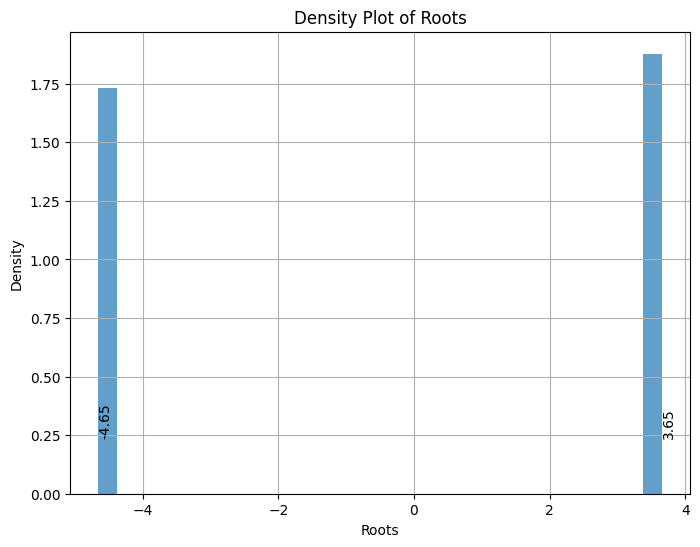

In [13]:
import matplotlib.pyplot as plt
# Range of initial guesses
initial_guesses = np.linspace(-10, 10, 100)

# Collect roots for each initial guess
roots = []
for guess in initial_guesses:
    root = fsolve(func_1, guess)
    roots.extend(root)

# Convert roots to a NumPy array
roots = np.array(roots)

# Create a density plot
plt.figure(figsize=(8, 6))
plt.hist(roots, bins=30, density=True, alpha=0.7)
plt.title("Density Plot of Roots")
plt.xlabel("Roots")
plt.ylabel("Density")
plt.grid(True)
# Add text annotation for unique roots
unique_roots = np.unique(np.round(roots, 5))
for root in unique_roots:
    plt.text(x = root, y = 0.25, s = f'{root:.2f}', rotation=90, color='black')
plt.show()

So, both roots are almost equally probable to be shown.

In [14]:
print(f'roots:{np.unique(np.round(roots,5))}')

roots:[-4.65331  3.65331]


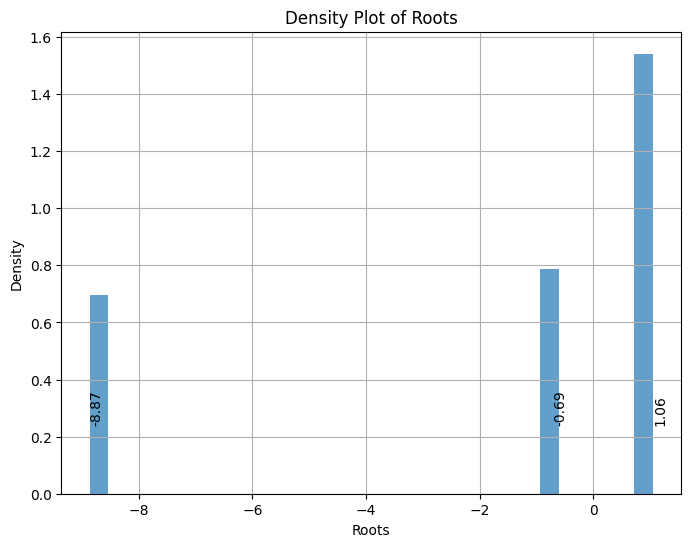

In [15]:
# Range of initial guesses
initial_guesses = np.linspace(-10, 10, 100)

# Collect roots for each initial guess
roots = []
for guess in initial_guesses:
    root = fsolve(func_2, guess)
    roots.extend(root)

# Convert roots to a NumPy array
roots = np.array(roots)

# Create a density plot
plt.figure(figsize=(8, 6))
plt.hist(roots, bins=30, density=True, alpha=0.7)
plt.title("Density Plot of Roots")
plt.xlabel("Roots")
plt.ylabel("Density")
plt.grid(True)
# Add text annotation for unique roots
unique_roots = np.unique(np.round(roots, 5))
for root in unique_roots:
    plt.text(x = root, y = 0.25, s = f'{root:.2f}', rotation=90, color='black')
plt.show()

In [16]:
print(f'roots:{np.unique(np.round(roots,5))}')

roots:[-8.86839 -0.69151  1.05991]


Here we can observe that our algorythm tends to prefer one root to others.

### Задание 4. 

При помощи функции `fsolve` из модуля `scipy.optimize` решите следующую систему уравнений:

\begin{equation}
    \begin{cases}
      x_{1}^{2} cos(x_{2}) = 4\\
      x_{1} x_{2} - x_{2} = 5
    \end{cases}\,.
\end{equation}

**Hint:** У меня получились корни 4.61 и 1.38.

In [17]:
def func_3(x):
    return [x[0]**2*np.cos(x[1]) - 4,
           x[0]*x[1] - x[1] - 5]
root = fsolve(func_3, [1, 1]) ## 1- initial guess
print(root)
np.isclose(func_3(root), [0.0, 0.0])  

[4.6177103  1.38208966]


array([ True,  True])

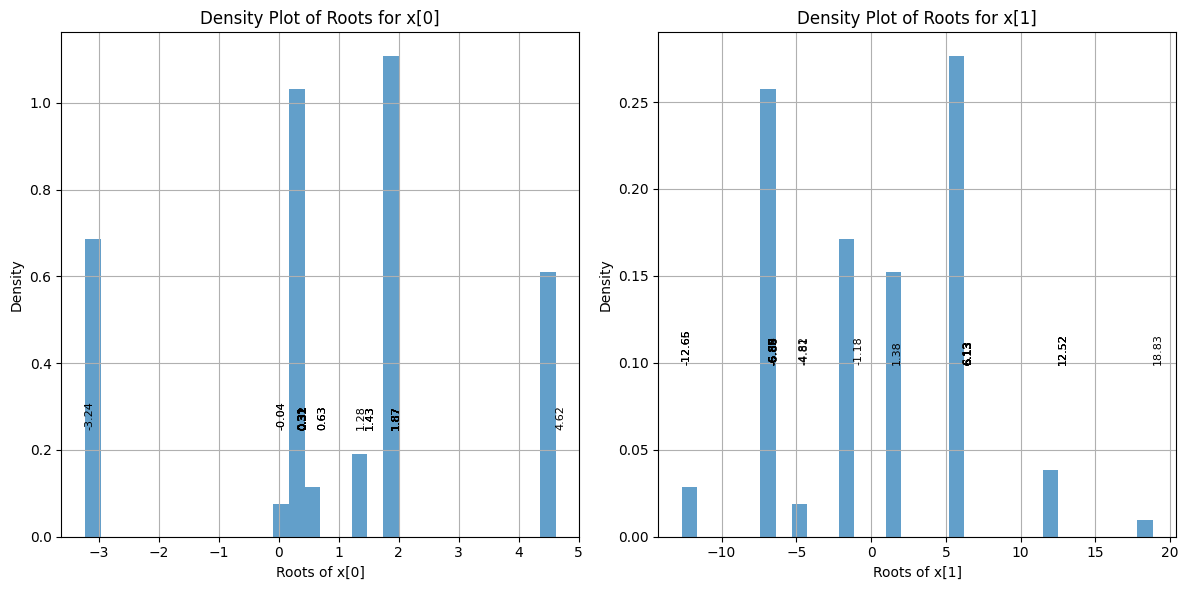

In [18]:
# Range of initial guesses
initial_guesses = np.linspace(-10, 10, 100)

# Collect roots for each initial guess
roots_x0 = []
roots_x1 = []
for guess in initial_guesses:
    root = fsolve(func_3, [guess, guess])
    roots_x0.append(root[0])  # Collect root of x[0]
    roots_x1.append(root[1])  # Collect root of x[1]

# Convert roots to NumPy arrays
roots_x0 = np.array(roots_x0)
roots_x1 = np.array(roots_x1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a density plot for roots of x[0]
ax1.hist(roots_x0, bins=30, density=True, alpha=0.7)
ax1.set_title("Density Plot of Roots for x[0]")
ax1.set_xlabel("Roots of x[0]")
ax1.set_ylabel("Density")
ax1.grid(True)

# Add text annotation for unique roots of x[0]
unique_roots_x0 = np.unique(np.round(roots_x0, 5))
for root in unique_roots_x0:
    ax1.text(x=root, y=0.25, s=f'{root:.2f}', rotation=90, color='black', fontsize=8)  # Decrease font size

# Create a density plot for roots of x[1]
ax2.hist(roots_x1, bins=30, density=True, alpha=0.7)
ax2.set_title("Density Plot of Roots for x[1]")
ax2.set_xlabel("Roots of x[1]")
ax2.set_ylabel("Density")
ax2.grid(True)

# Add text annotation for unique roots of x[1]
unique_roots_x1 = np.unique(np.round(roots_x1, 5))
for root in unique_roots_x1:
    ax2.text(x=root, y=0.1, s=f'{root:.2f}', rotation=90, color='black', fontsize=8)  # Decrease font size

plt.tight_layout()
plt.show()

As could be observed here - many roots are possible, depending on the starting point.

### Задание 4.5

Давайте сделаем простую оптимизацию с ограничениями

Link to the example problem: https://economics.uwo.ca/math/resources/calculus-multivariable-functions/7-partial-derivatives-constrained-optimization/content/


To find the optimal consumption bundle using the Lagrange method, we need to maximize the utility function $u(x, y) = xy$ subject to the budget constraint $P_x \cdot x + P_y \cdot y >= 400$, where $P_x = 10$ is the price of $x$, $P_y = 20$ is the price of $y$, and the budget is $400$. x, y >= 0


In [19]:
from scipy.optimize import minimize

# Define the utility function
def utility_function(x):
    return -1 * (x[0] * x[1])

# Define the budget constraint
def budget_constraint(x):
    return -1 * (10 * x[0] + 20 * x[1] - 400)

# Overall constraints
cons = ({'type': 'ineq', 'fun': budget_constraint})

# Bounds for the variables
bnds = ((0, None), (0, None))  # x and y must be non-negative

# Initial guess for optimization
x0 = [1, 1]  # Initial guess for x and y

# Perform optimization
res_util = minimize(utility_function, x0=x0, constraints=cons, method='SLSQP', bounds=bnds)

# Print the result
print(f"Optimized value of x: {round(res_util.x[0], 2)} \n")
print(f"Optimized value of y: {round(res_util.x[1], 2)} \n")

Optimized value of x: 20.0 

Optimized value of y: 10.0 



Coincides with the original problem solution!

### Задание 5.

Выгрузите с сайта РосСтата данные для индекса потребительских цен на товары и услуги по Российской Федерации (https://rosstat.gov.ru/storage/mediabank/ipc_mes_02-2024.xlsx). В этом файле нас интересует страница с названием "01", содержащая ИПЦ на товары и услуги.

После выгрузки данных, обработайте датафрейм так, чтобы с ним можно было работать.

В конце концов, приведите таблицу к следующему виду: индекс таблицы должен содержать в себе ГОД и МЕСЯЦ в формате 'yyyy-m' (например, '2019-1'), и единственным столбцом оставьте сами значения ИПЦ. То есть как бы "распрямите" датасет.

После проделанной работы отобразите на графике то, что у вас получилось.

Это задание достаточно нетривиальное. Если его не сделать, то ничего страшного не будет. Но, чтобы его сделать, придется над ним "посидеть" :)

In [20]:
from bs4 import BeautifulSoup
from requests import get
import urllib

import time

import datetime
from dateutil.relativedelta import relativedelta

In [21]:
CPI_path = 'https://rosstat.gov.ru/storage/mediabank/ipc_mes_02-2024.xlsx'
CPI_store_path = 'CPI_data.xlsx'

urllib.request.urlretrieve(CPI_path, CPI_store_path)

('CPI_data.xlsx', <http.client.HTTPMessage at 0x29a3cf43810>)

In [22]:
CPI_data = pd.read_excel('CPI_data.xlsx', sheet_name='01')
CPI_data

,Индексы потребительских цен на товары и услуги1) по Российской Федерации в 1991-2024*)гг.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,К содержанию,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"на конец периода, в %",NaN,NaN
2,NaN,1991.0,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,...,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022,2023.00,2024
3,к концу предыдущего месяца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,январь,106.2,345.30,125.80,117.90,117.77,104.11,102.34,101.51,108.38,...,103.85,100.96,100.62,100.31,101.01,100.40,100.67,100.99,100.84,100.86
5,февраль,104.8,138.00,124.70,110.82,111.02,102.79,101.54,100.89,104.13,...,102.22,100.63,100.22,100.21,100.44,100.33,100.78,101.17,100.46,100.68
6,март,106.3,129.90,120.10,107.41,108.94,102.80,101.43,100.64,102.79,...,101.21,100.46,100.13,100.29,100.32,100.55,100.66,107.61,100.37,NaN
7,апрель,163.5,121.70,118.70,108.49,108.47,102.16,100.96,100.38,103.03,...,100.46,100.44,100.33,100.38,100.29,100.83,100.58,101.56,100.38,NaN
8,май,103.0,111.90,118.10,106.91,107.93,101.60,100.94,100.50,102.22,...,100.35,100.41,100.37,100.38,100.34,100.27,100.74,100.12,100.31,NaN
9,июнь,101.2,119.10,119.90,106.00,106.66,101.17,101.10,100.08,101.91,...,100.19,100.36,100.61,100.49,100.04,100.22,100.69,99.65,100.37,NaN


#### Data cleaning

In [23]:
CPI_data_clean = CPI_data.iloc[np.r_[2, 4:16], :]
CPI_data_clean

,Индексы потребительских цен на товары и услуги1) по Российской Федерации в 1991-2024*)гг.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
2,NaN,1991.0,1992.0,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,...,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022,2023.00,2024
4,январь,106.2,345.3,125.80,117.90,117.77,104.11,102.34,101.51,108.38,...,103.85,100.96,100.62,100.31,101.01,100.40,100.67,100.99,100.84,100.86
5,февраль,104.8,138.0,124.70,110.82,111.02,102.79,101.54,100.89,104.13,...,102.22,100.63,100.22,100.21,100.44,100.33,100.78,101.17,100.46,100.68
6,март,106.3,129.9,120.10,107.41,108.94,102.80,101.43,100.64,102.79,...,101.21,100.46,100.13,100.29,100.32,100.55,100.66,107.61,100.37,NaN
7,апрель,163.5,121.7,118.70,108.49,108.47,102.16,100.96,100.38,103.03,...,100.46,100.44,100.33,100.38,100.29,100.83,100.58,101.56,100.38,NaN
8,май,103.0,111.9,118.10,106.91,107.93,101.60,100.94,100.50,102.22,...,100.35,100.41,100.37,100.38,100.34,100.27,100.74,100.12,100.31,NaN
9,июнь,101.2,119.1,119.90,106.00,106.66,101.17,101.10,100.08,101.91,...,100.19,100.36,100.61,100.49,100.04,100.22,100.69,99.65,100.37,NaN
10,июль,100.6,110.6,122.39,105.33,105.38,100.72,100.93,100.17,102.82,...,100.80,100.54,100.07,100.27,100.20,100.35,100.31,99.61,100.63,NaN
11,август,100.5,108.6,126.00,104.62,104.56,99.79,99.86,103.67,101.16,...,100.35,100.01,99.46,100.01,99.76,99.96,100.17,99.48,100.28,NaN
12,сентябрь,101.1,111.5,123.00,107.96,104.46,100.33,99.70,138.43,101.48,...,100.57,100.17,99.85,100.16,99.84,99.93,100.60,100.05,100.87,NaN


In [24]:
# mapping month names to their numeric values
month_to_number = {
    'январь': 1,
    'февраль': 2,
    'март': 3,
    'апрель': 4,
    'май': 5,
    'июнь': 6,
    'июль': 7,
    'август': 8,
    'сентябрь': 9,
    'октябрь': 10,
    'ноябрь': 11,
    'декабрь': 12
}

# Map month names to their numeric values
CPI_data_clean.iloc[1:, 0] = CPI_data_clean.iloc[1:, 0].map(lambda x: month_to_number[x])

In [25]:
CPI_data_clean.reset_index(inplace=True, drop=True)
CPI_data_clean.drop(CPI_data_clean.columns[0], axis = 'columns', inplace=True)

In [26]:
CPI_data_clean

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1991.0,1992.0,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,...,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022,2023.00,2024
1,106.2,345.3,125.80,117.90,117.77,104.11,102.34,101.51,108.38,102.33,...,103.85,100.96,100.62,100.31,101.01,100.40,100.67,100.99,100.84,100.86
2,104.8,138.0,124.70,110.82,111.02,102.79,101.54,100.89,104.13,101.04,...,102.22,100.63,100.22,100.21,100.44,100.33,100.78,101.17,100.46,100.68
3,106.3,129.9,120.10,107.41,108.94,102.80,101.43,100.64,102.79,100.64,...,101.21,100.46,100.13,100.29,100.32,100.55,100.66,107.61,100.37,NaN
4,163.5,121.7,118.70,108.49,108.47,102.16,100.96,100.38,103.03,100.89,...,100.46,100.44,100.33,100.38,100.29,100.83,100.58,101.56,100.38,NaN
5,103.0,111.9,118.10,106.91,107.93,101.60,100.94,100.50,102.22,101.75,...,100.35,100.41,100.37,100.38,100.34,100.27,100.74,100.12,100.31,NaN
6,101.2,119.1,119.90,106.00,106.66,101.17,101.10,100.08,101.91,102.55,...,100.19,100.36,100.61,100.49,100.04,100.22,100.69,99.65,100.37,NaN
7,100.6,110.6,122.39,105.33,105.38,100.72,100.93,100.17,102.82,101.79,...,100.80,100.54,100.07,100.27,100.20,100.35,100.31,99.61,100.63,NaN
8,100.5,108.6,126.00,104.62,104.56,99.79,99.86,103.67,101.16,100.98,...,100.35,100.01,99.46,100.01,99.76,99.96,100.17,99.48,100.28,NaN
9,101.1,111.5,123.00,107.96,104.46,100.33,99.70,138.43,101.48,101.32,...,100.57,100.17,99.85,100.16,99.84,99.93,100.60,100.05,100.87,NaN


### Changing the type of the row/column by index

In [27]:
CPI_data_clean_T = CPI_data_clean.T
a = CPI_data_clean_T[0].astype(int)
CPI_data_clean_T['year'] = a
CPI_data_clean_T.drop(CPI_data_clean_T.columns[0], axis=1, inplace=True)
CPI_data_clean_T.head()

,1,2,3,4,5,6,7,8,9,10,11,12,year
Unnamed: 1,106.2,104.8,106.3,163.5,103.0,101.2,100.6,100.5,101.1,103.5,108.9,112.1,1991
Unnamed: 2,345.3,138.0,129.9,121.7,111.9,119.1,110.6,108.6,111.5,122.9,126.1,125.2,1992
Unnamed: 3,125.8,124.7,120.1,118.7,118.1,119.9,122.39,126.0,123.0,119.5,116.39,112.5,1993
Unnamed: 4,117.9,110.82,107.41,108.49,106.91,106.0,105.33,104.62,107.96,115.0,114.61,116.44,1994
Unnamed: 5,117.77,111.02,108.94,108.47,107.93,106.66,105.38,104.56,104.46,104.72,104.56,103.2,1995


Let's undo the pivot table then.

In [28]:
# Melt the DataFrame to convert columns into rows - undo pivot table
melted_df = CPI_data_clean_T.melt(id_vars=['year'], var_name='month', value_name='value')

# Combine year and month columns to form the index
melted_df['month-year'] = melted_df['month'].astype(str) + '-' + melted_df['year'].astype(str)

To datetime.

In [29]:
import sys

path = 'C:/Users/Popov/Documents/NES_studies/Python/NES_Helper' # path of the modul
sys.path.append(path)

from NES_helper import Col_dt

In [30]:
CPI_data_final = Col_dt(melted_df, 'month-year', '%m-%Y')
CPI_data_final = CPI_data_final.col_dt()
CPI_data_final.head()

,year,month,value,month-year
0,1991,1,106.2,1991-01-01
1,1992,1,345.3,1992-01-01
2,1993,1,125.8,1993-01-01
3,1994,1,117.9,1994-01-01
4,1995,1,117.77,1995-01-01


In [31]:
CPI_data_final['month-year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 408 entries, 0 to 407
Series name: month-year
Non-Null Count  Dtype         
--------------  -----         
408 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 KB


In [32]:
# Set the month-year as the index
CPI_data_final = melted_df.set_index('month-year')['value'].sort_index()
CPI_data_final.name = 'CPI_value'
CPI_data_final

month-year
1991-01-01    106.2
1991-02-01    104.8
1991-03-01    106.3
1991-04-01    163.5
1991-05-01    103.0
              ...  
2024-08-01      NaN
2024-09-01      NaN
2024-10-01      NaN
2024-11-01      NaN
2024-12-01      NaN
Name: CPI_value, Length: 408, dtype: object

Success! Now graphs

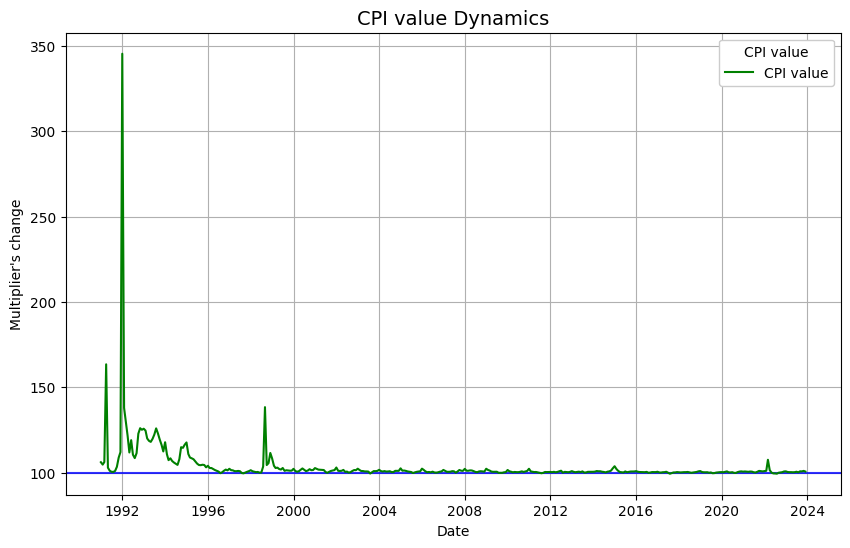

In [33]:
fig = plt.figure(figsize=(10,6))

start = '1991-01-01'
end = '2023-12-01'

plt.axhline(y=100, color='blue', alpha=0.8)

plt.plot(CPI_data_final[start:end], label='CPI value', color='green')

plt.legend(title='CPI value', framealpha=1)

plt.title('CPI value Dynamics', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Multiplier\'s change')

plt.grid()

None

However, usually CPI is recalculated, give the base year (and in the growth terms)

In [34]:
base_year = pd.to_datetime('2000-01-01')
CPI_data_final = CPI_data_final/100
# Find the row corresponding to the year 2000
cpi_2000 = CPI_data_final.loc[base_year]

# Iterate over the index (month-year) and apply the provided logic
for idx in CPI_data_final.index:
    if idx < base_year:  # Data before 2000
        # T+1 CPI new = T+1 CPI old * CPI 2000
        CPI_data_final.loc[idx] *= cpi_2000
    else:  # Data from 2000 onwards
        # T-1 CPI new = CPI 2000 / T-1 CPI old
        CPI_data_final.loc[idx] = np.where(~np.isnan(CPI_data_final.loc[idx]), cpi_2000 / CPI_data_final.loc[idx], np.nan)

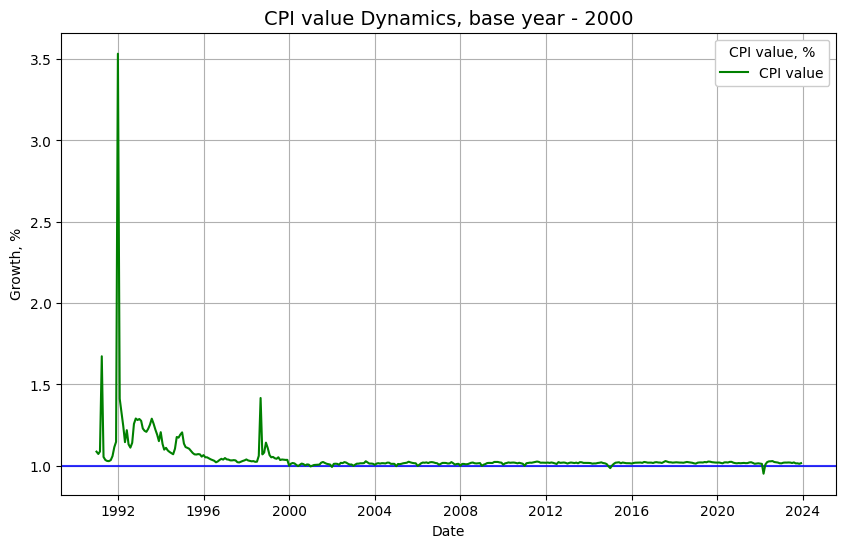

In [35]:
fig = plt.figure(figsize=(10,6))

start = '1991-01-01'
end = '2023-12-01'

plt.axhline(y=1, color='blue', alpha=0.8)

plt.plot(CPI_data_final[start:end], label='CPI value', color='green')

plt.legend(title='CPI value, %', framealpha=1)

plt.title('CPI value Dynamics, base year - 2000', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Growth, %')

plt.grid()

None